In [1]:
import os

import math
from natsort import natsorted

import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import colors
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.colors import to_rgb

import zarr
from skimage.color import gray2rgb

parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))

In [2]:
def PlotLatentSpace(main, color_dict, kde, scatter_point_size, filename, save_dir):

    fig, ax = plt.subplots(figsize=(10, 10)) 

    if kde:
        g = sns.kdeplot(
            data=main, x='bi_emb1', y='bi_emb2', hue='VAE9_VIG7',
            thresh=0.68, levels=20, fill=False, palette=color_dict, alpha=1.0
        )

        ax.axis('auto')
        plt.xlabel('UMAP1')
        plt.ylabel('UMAP2')
        plt.xlim([4.5, 12.5])
        plt.ylim([-6, 4])
        
        legend_elements = []
        for e, i in enumerate(natsorted(main['VAE9_VIG7'].unique())):

            legend_elements.append(
                Line2D([0], [0], marker='o', color='w', label=i,
                       markerfacecolor=color_dict[i], 
                       markeredgecolor=None, lw=0.25, markersize=9)
            )
        
        plt.legend(
            handles=legend_elements, labelspacing=0.15, 
            bbox_to_anchor=(1.1, 1.0)
        )

        plt.grid(False)
        ax.set_aspect('equal', adjustable='box')

        plt.tight_layout()
        plt.savefig(os.path.join(save_dir, f'{filename}.pdf'))
        plt.show()
        plt.close('all')
    
    else:
        c = [color_dict[i] for i in main['VAE9_VIG7']]
        
        plt.scatter(
            main['bi_emb1'], main['bi_emb2'], 
            c=c, ec='k', lw=0.0, s=scatter_point_size
        )

        ax.axis('auto')
        plt.xlabel('UMAP1')
        plt.ylabel('UMAP2')
        plt.xlim([4, 13])
        plt.ylim([-6, 4])

        legend_elements = []
        for e, i in enumerate(natsorted(main['VAE9_VIG7'].unique())):

            legend_elements.append(
                Line2D([0], [0], marker='o', color='w', label=i,
                       markerfacecolor=color_dict[i], 
                       markeredgecolor=None, lw=0.25, markersize=9)
            )

        plt.legend(
            handles=legend_elements, labelspacing=0.15, 
            bbox_to_anchor=(1.1, 1.0)
        )

        plt.grid(False)
        ax.set_aspect('equal', adjustable='box')
        
        plt.tight_layout()
        plt.savefig(os.path.join(save_dir, f'{filename}.png'), dpi=800)
        plt.show()
        plt.close('all')


In [3]:
def PlotInputImgs(numExamples, numColumns, imgs, intensity_multiplier, labels, fontSize, channel_color_dict, fileName, save_dir):

    numRows = math.ceil(numExamples / numColumns)
    grid_dims = (numRows, numColumns)

    sns.set_style('whitegrid')
    fig = plt.figure(figsize=(20, 10))

    custom_lines = []
    for e, row in enumerate(labels.iterrows()):

        plt.subplot(grid_dims[0], grid_dims[1], e + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
       
        # initialize array of zeros with shape of full-size image
        overlay = np.zeros((imgs.shape[2], imgs.shape[3]))
        
        overlay = gray2rgb(overlay)
        
        for name, (ch, color) in channel_color_dict.items():

            lyr = imgs[ch, row[0], :, :]

            lyr = lyr.astype('float')

            lyr = gray2rgb(lyr)

            lyr = lyr * intensity_multiplier
            
            lyr = lyr * to_rgb(color)

            overlay += lyr

            custom_lines.append(Line2D([0], [0], color=color, lw=5))

        label = row[1]['VAE9_VIG7']
        
        overlay = np.clip(overlay, 0, 1)
        
        plt.imshow(overlay, cmap=plt.cm.binary)
        plt.xlabel(label, size=fontSize, labelpad=1.5)

    legend_elements = []
    for name, (ch, color) in channel_color_dict.items():
        legend_elements.append(Line2D([0], [0], color=color, lw=5, label=name))

    fig.legend(
        handles=legend_elements, prop={'size': 11}, 
        bbox_to_anchor=(0.94, 0.99)
    )

    plt.subplots_adjust(bottom=0.01, top=0.99, left=0.01, right=0.85)
    plt.savefig(
        os.path.join(save_dir, f'{fileName}.pdf'), bbox_inches='tight'
    )
    plt.show()
    plt.close('all')

In [4]:
out = os.path.join(parent_dir, 'output/binary')
if not os.path.exists(out):
    os.makedirs(out)

main = pd.read_csv(
    os.path.join(parent_dir, 
                 'input/binary_patches2/6_latent_space_LD412/main.csv')
)

color_dict1 = {0: np.array([0.122, 0.467, 0.706]),
        1: np.array([0.682, 0.780, 0.910]),
        3: np.array([1.00, 0.733, 0.471]),
        5: np.array([0.598, 0.875, 0.543]),
        6: np.array([0.839, 0.153, 0.157]),
        21: np.array([0.682, 0.780, 0.910]),
        22: np.array([1.0, 0.498, 0.055])
}

color_dict2 = {0: np.array([0.0, 0.0, 0.0]),
        1: np.array([0.0, 0.0, 0.0]),
        3: np.array([1.00, 0.733, 0.471]),
        5: np.array([0.598, 0.875, 0.543]),
        6: np.array([0.839, 0.153, 0.157]),
        21: np.array([0.0, 0.0, 0.0]),
        22: np.array([0.0, 0.0, 0.0])
}

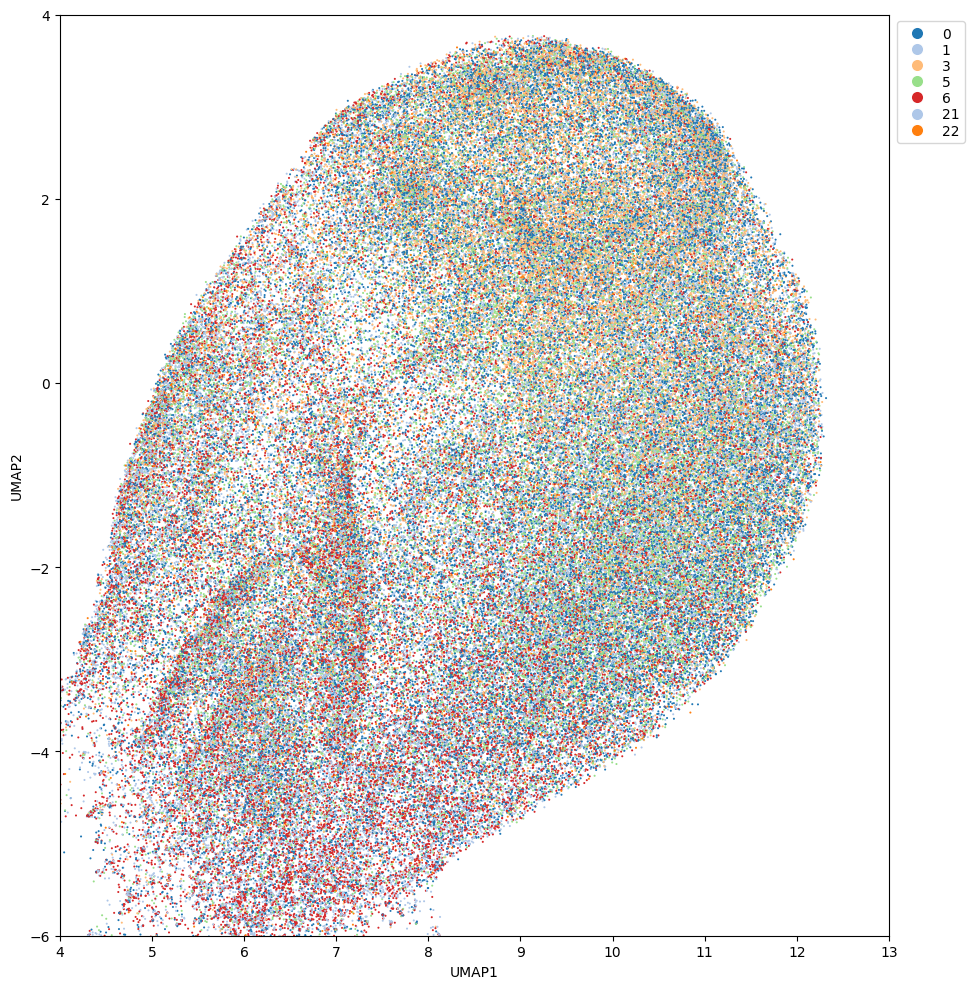

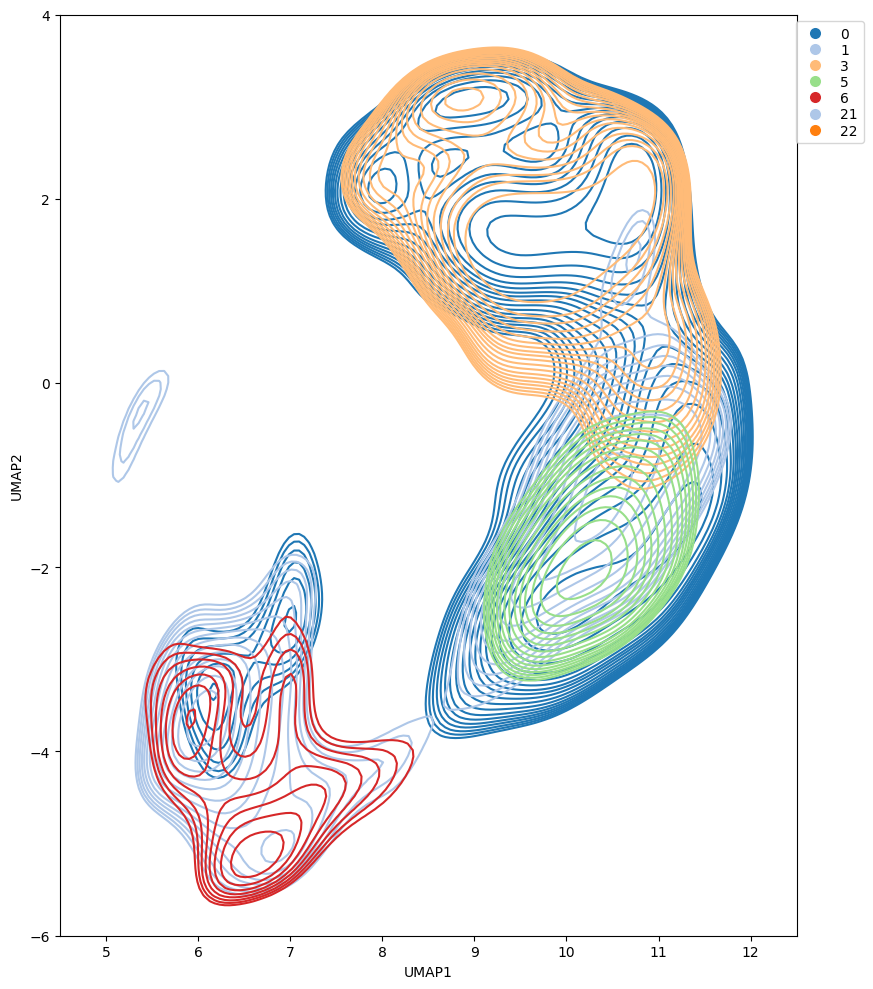

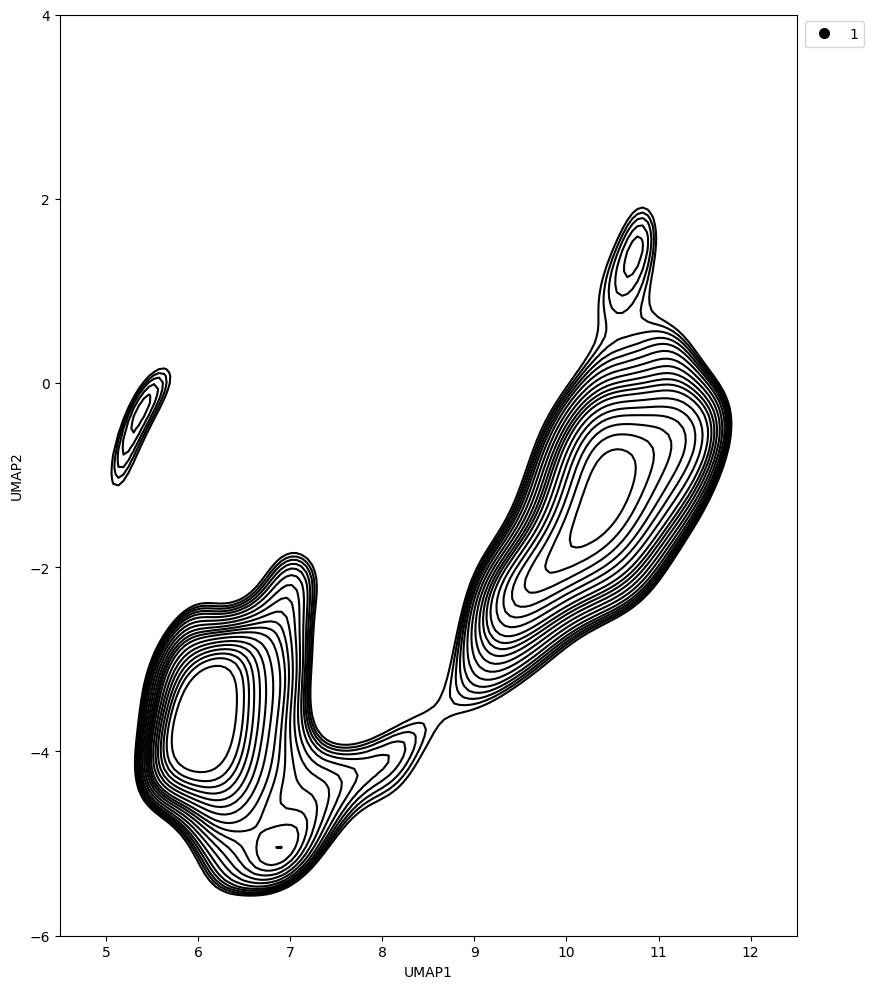

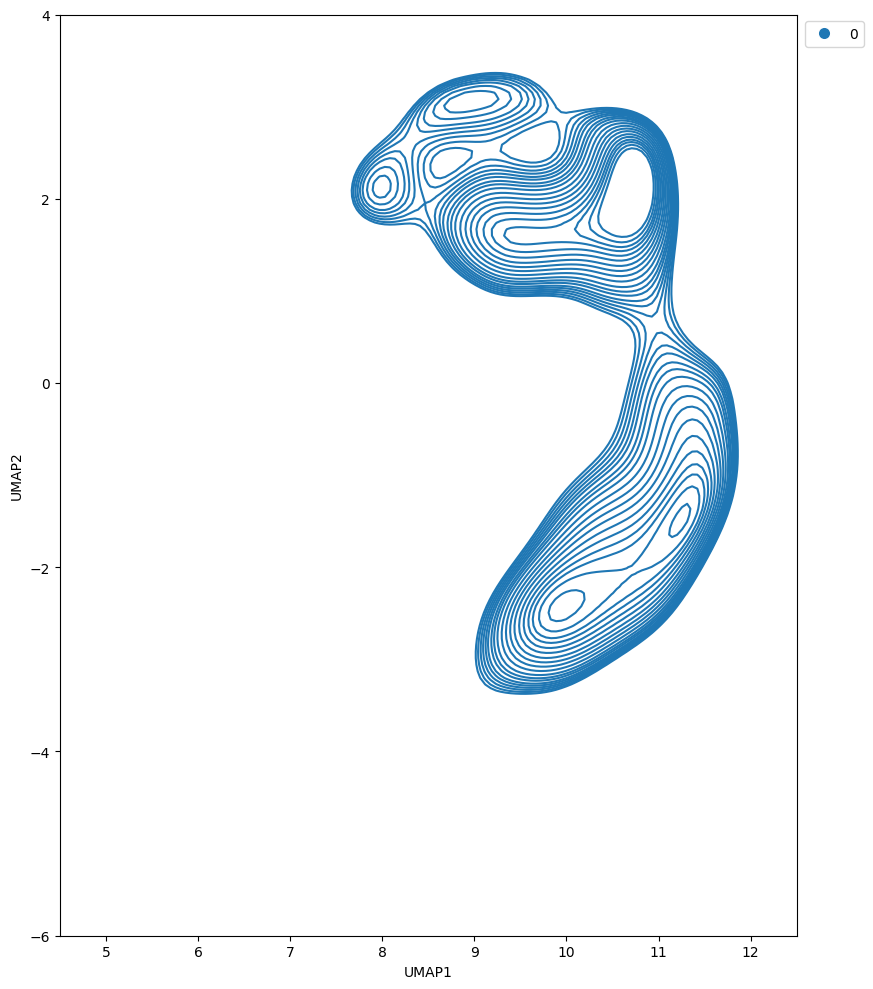

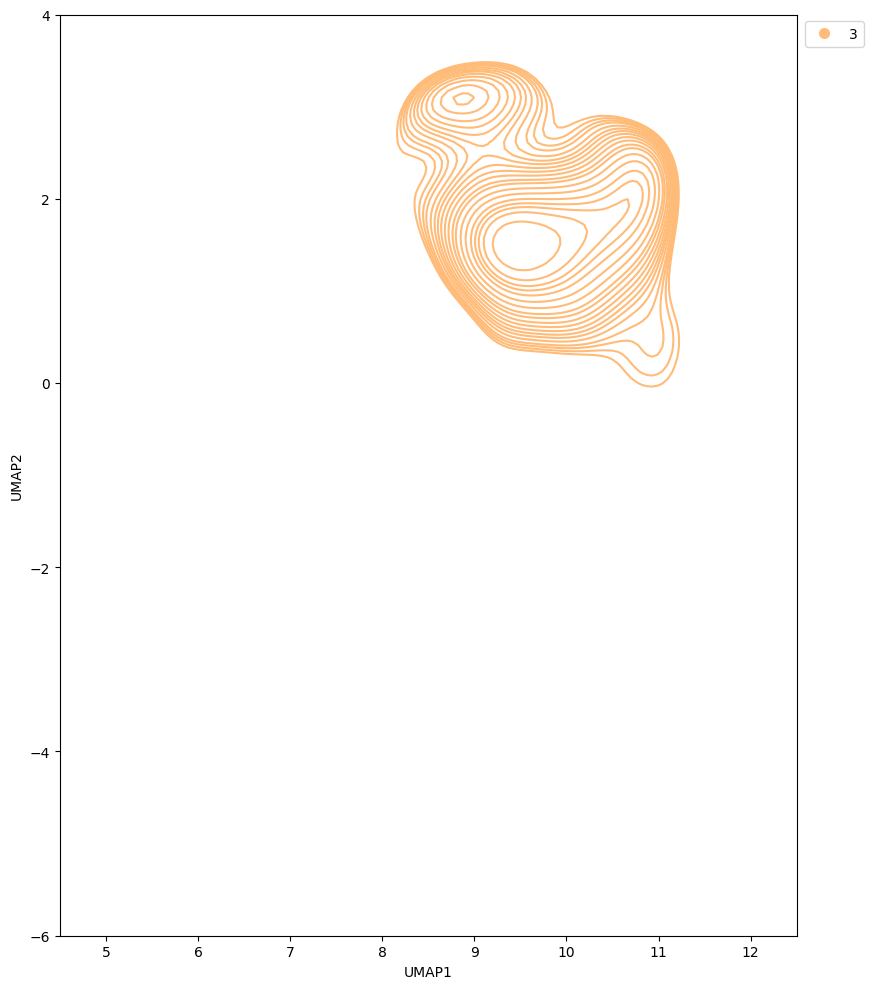

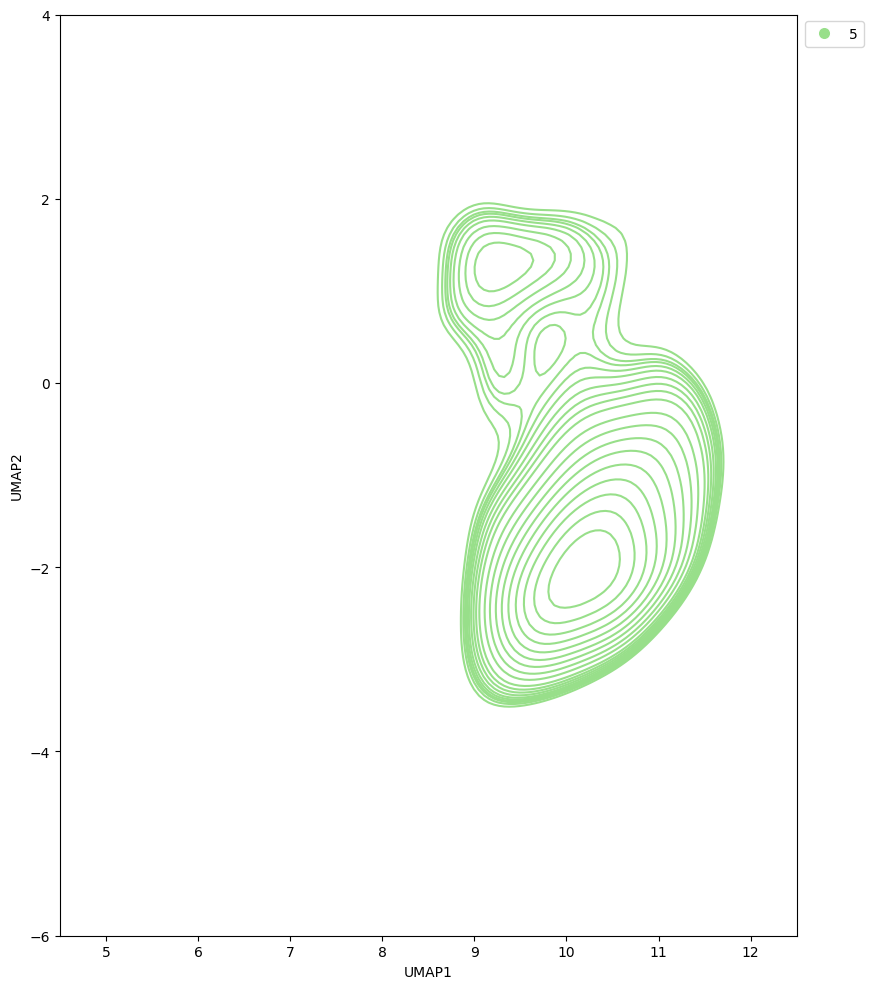

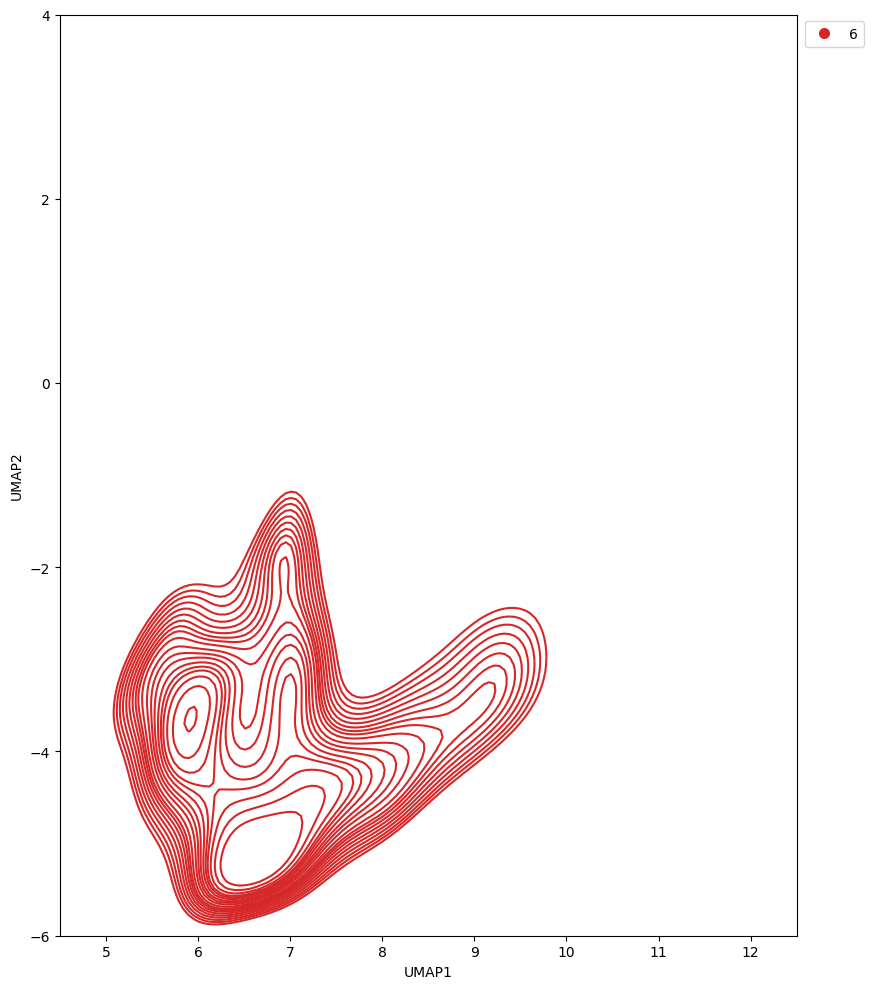

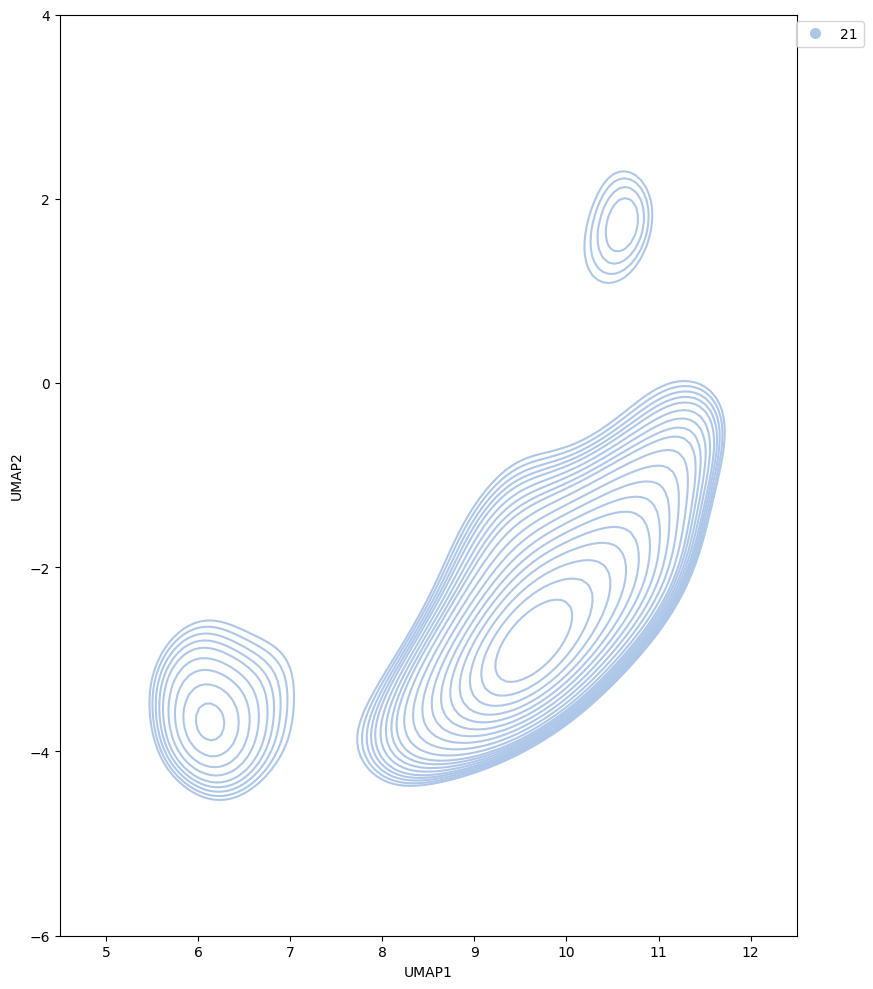

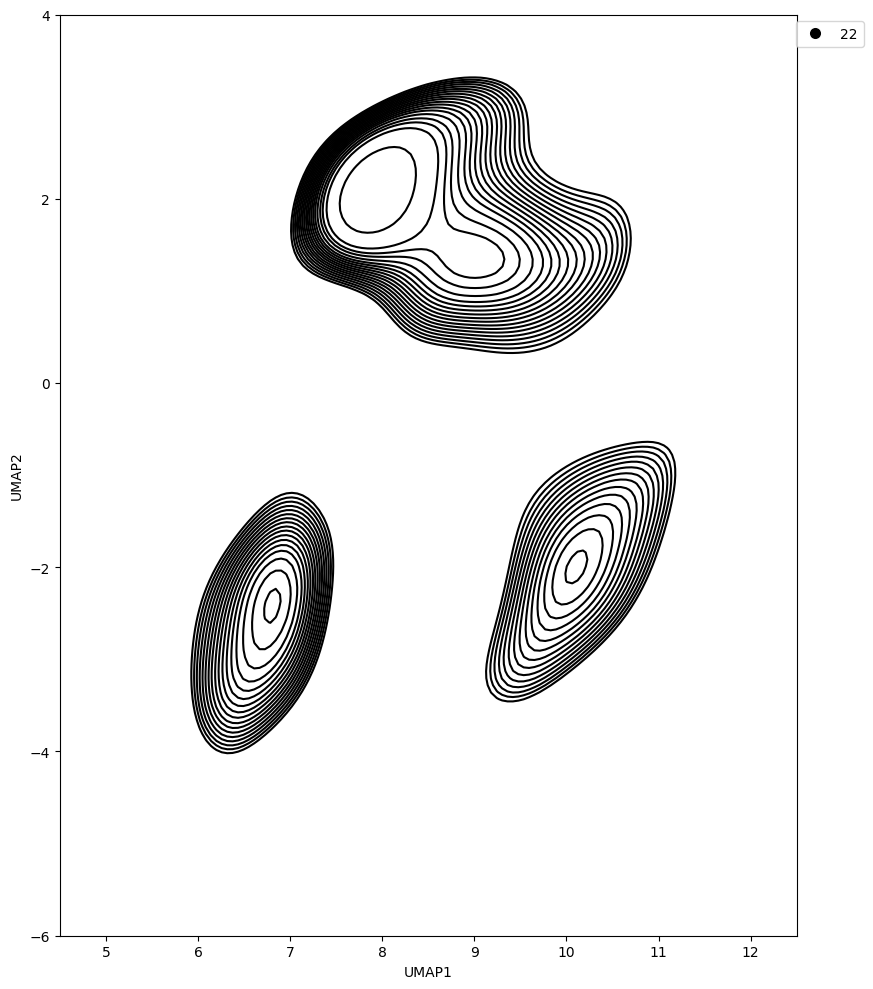

In [5]:
PlotLatentSpace(
    main=main,
    color_dict=color_dict1,
    kde=False,
    scatter_point_size=350000 / len(main),
    filename='raw_combo',
    save_dir=out
    )

PlotLatentSpace(
    main=main,
    color_dict=color_dict1,
    kde=True,
    scatter_point_size=350000 / len(main),
    filename='kde_combo',
    save_dir=out
    )
PlotLatentSpace(
    main=main[main['VAE9_VIG7'].isin([1])],
    color_dict=color_dict2,
    kde=True,
    scatter_point_size=350000 / len(main),
    filename='cluster_1_kde',
    save_dir=out
    )
PlotLatentSpace(
    main=main[main['VAE9_VIG7'].isin([0])],
    color_dict=color_dict1,
    kde=True,
    scatter_point_size=350000 / len(main),
    filename='cluster_0_kde',
    save_dir=out
    )
PlotLatentSpace(
    main=main[main['VAE9_VIG7'].isin([3])],
    color_dict=color_dict1,
    kde=True,
    scatter_point_size=350000 / len(main),
    filename='cluster_3_kde',
    save_dir=out
    )
PlotLatentSpace(
    main=main[main['VAE9_VIG7'].isin([5])],
    color_dict=color_dict1,
    kde=True,
    scatter_point_size=350000 / len(main),
    filename='cluster_5_kde',
    save_dir=out
    )
PlotLatentSpace(
    main=main[main['VAE9_VIG7'].isin([6])],
    color_dict=color_dict1,
    kde=True,
    scatter_point_size=350000 / len(main),
    filename='cluster_6_kde',
    save_dir=out
    )
PlotLatentSpace(
    main=main[main['VAE9_VIG7'].isin([21])],
    color_dict=color_dict1,
    kde=True,
    scatter_point_size=350000 / len(main),
    filename='cluster_21_kde',
    save_dir=out
    )
PlotLatentSpace(
    main=main[main['VAE9_VIG7'].isin([22])],
    color_dict=color_dict2,
    kde=True,
    scatter_point_size=350000 / len(main),
    filename='cluster_22_kde',
    save_dir=out
    )

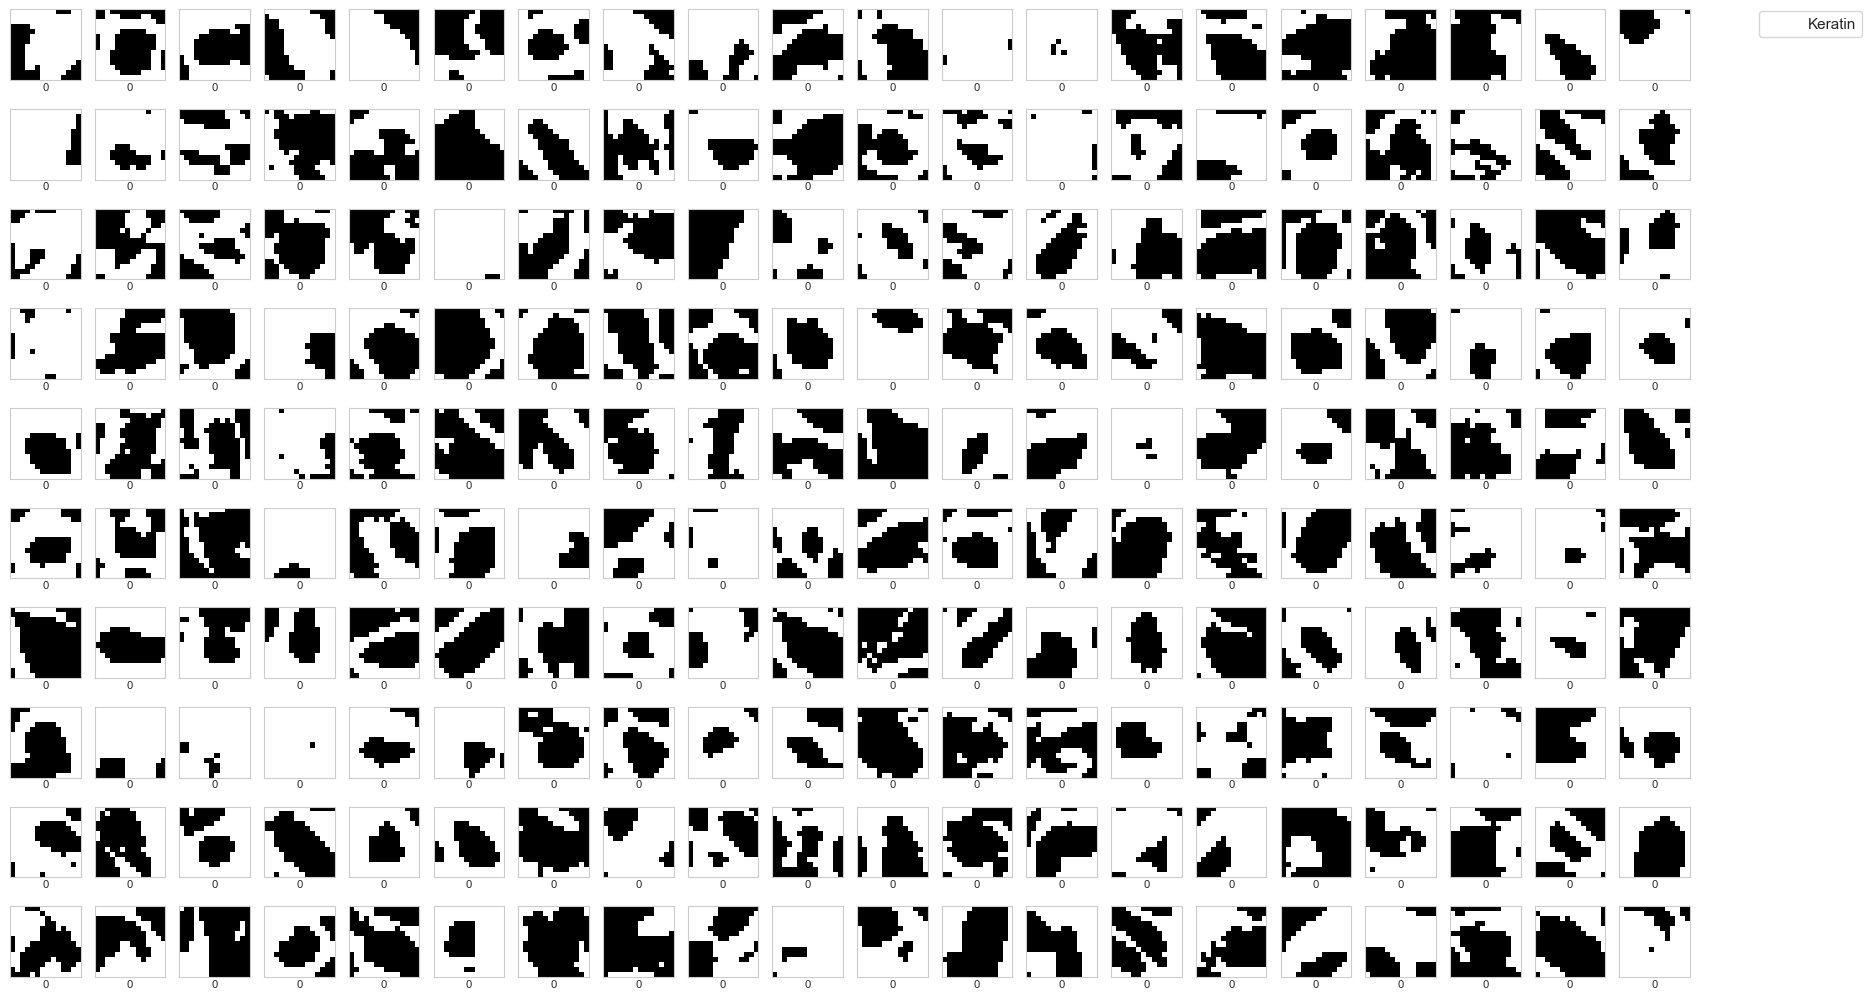

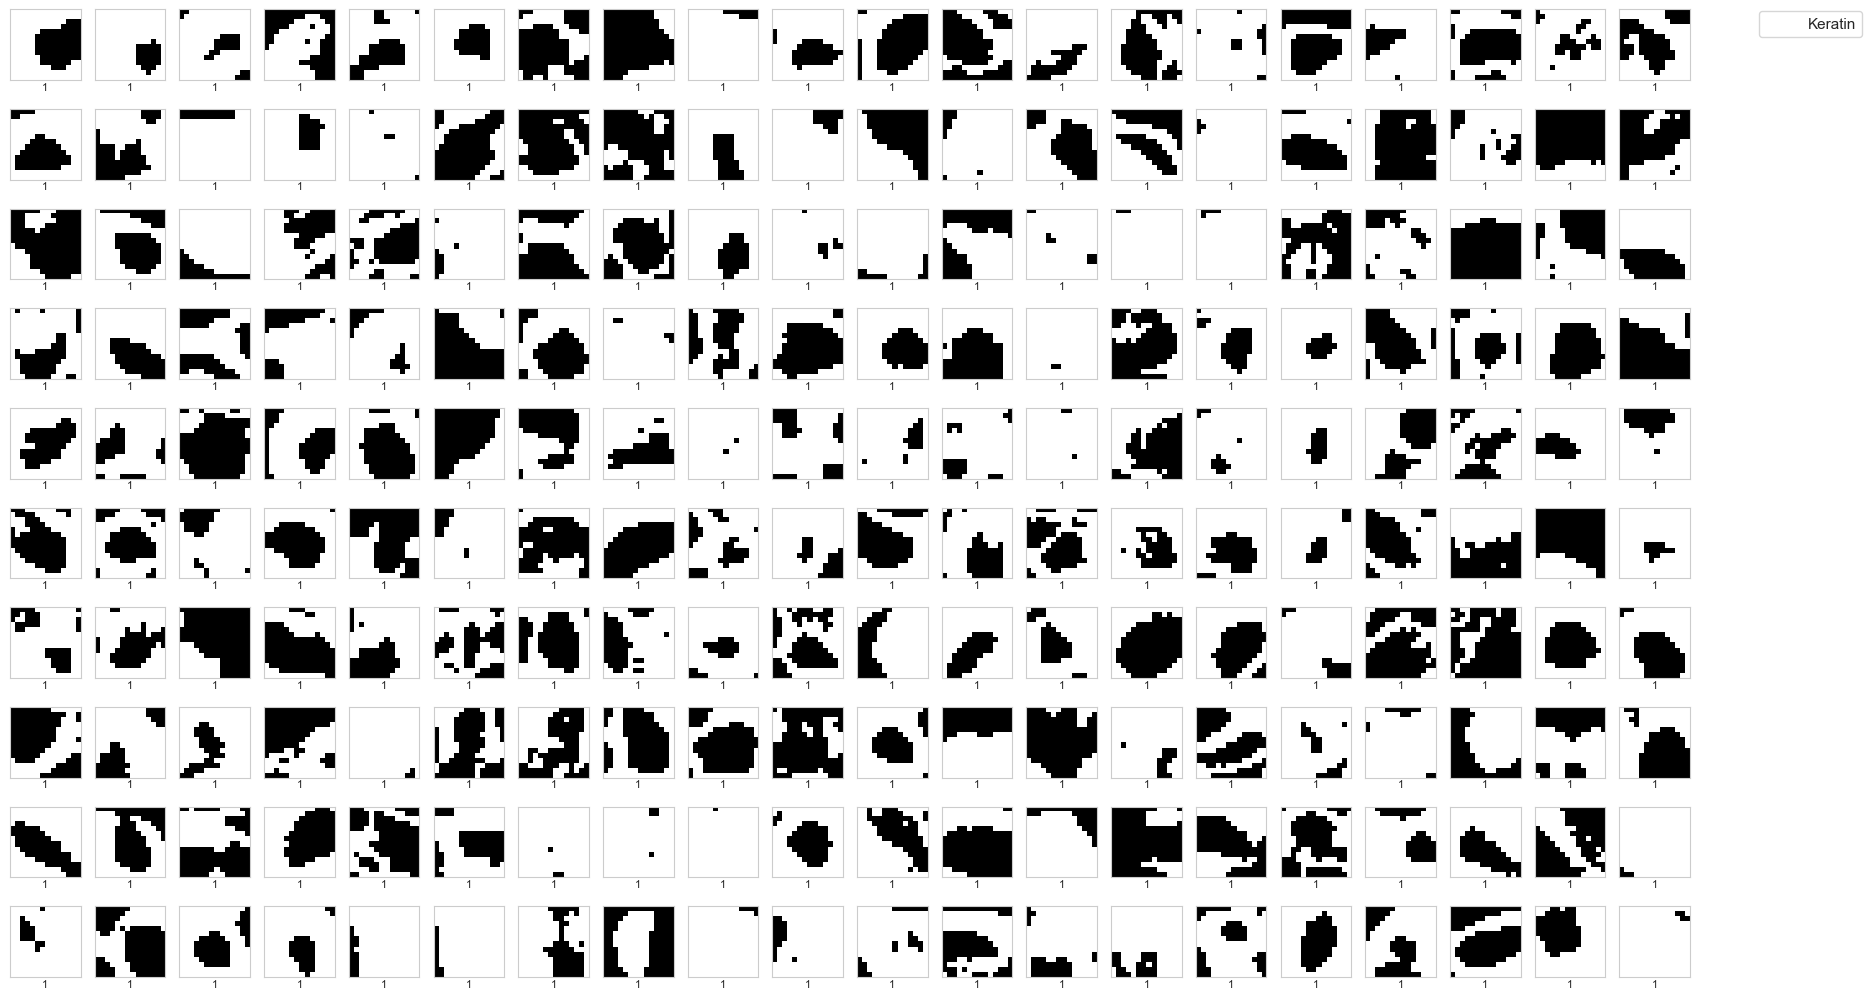

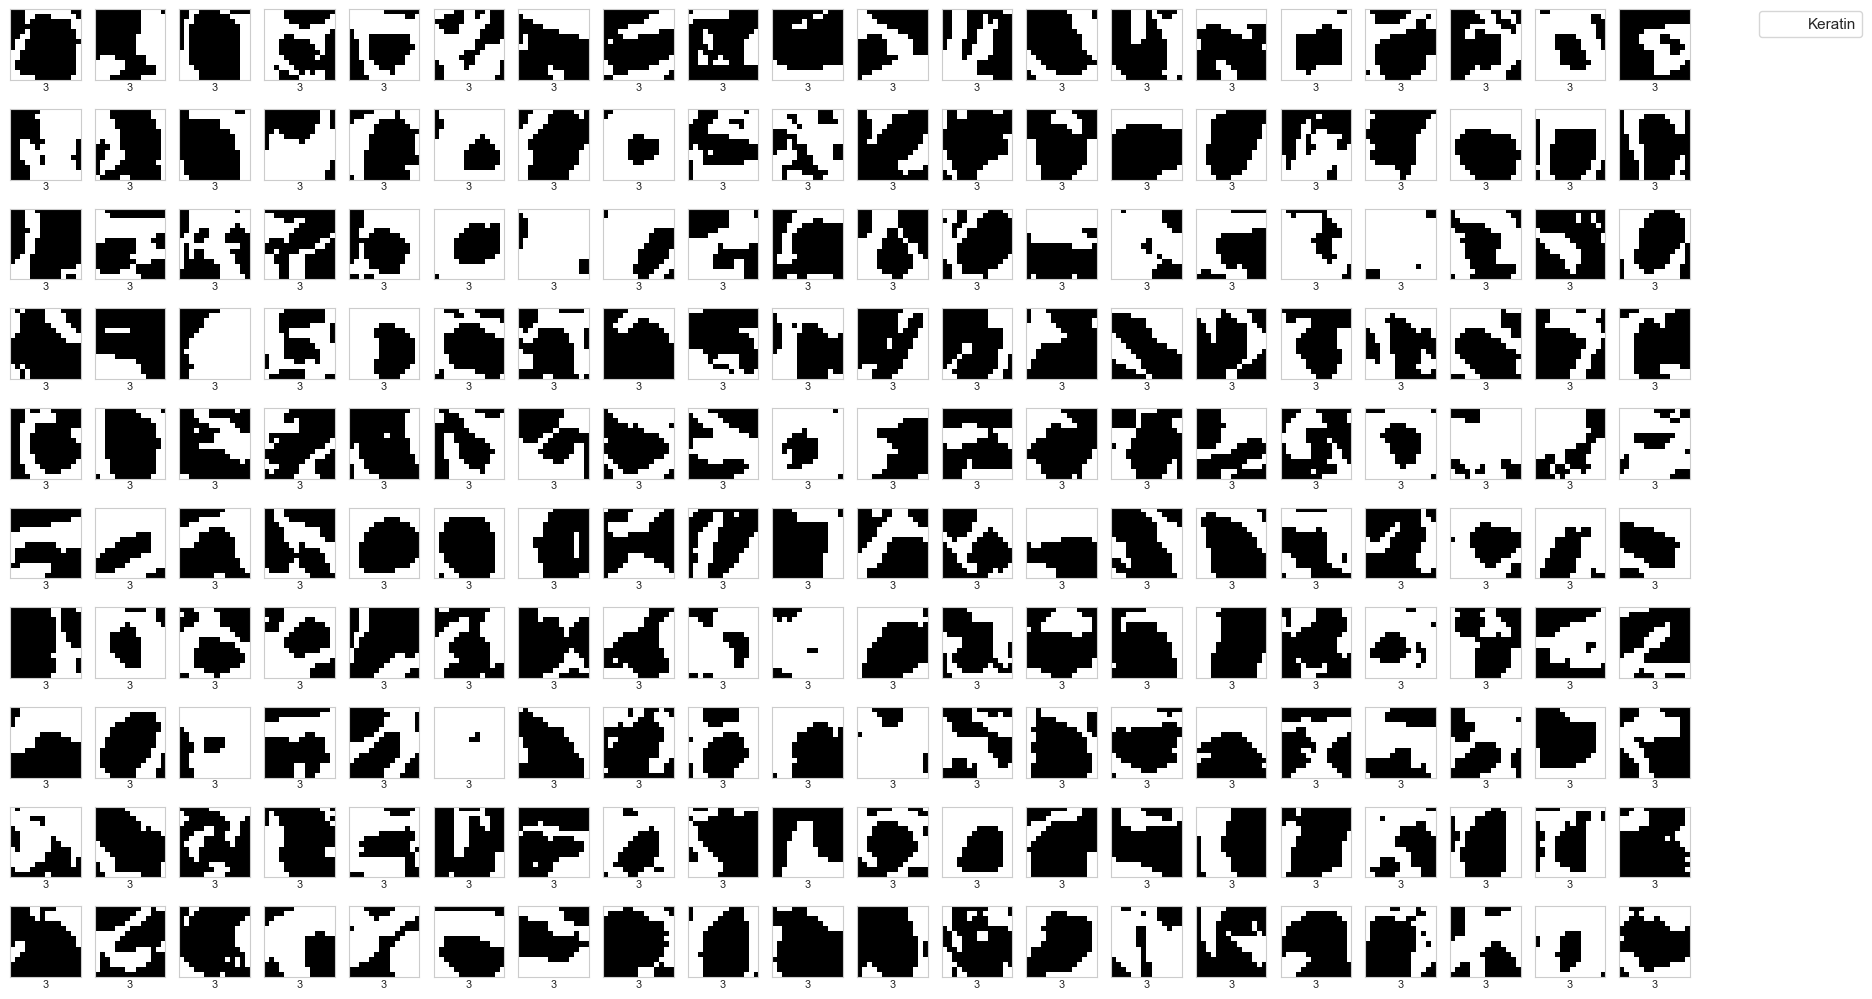

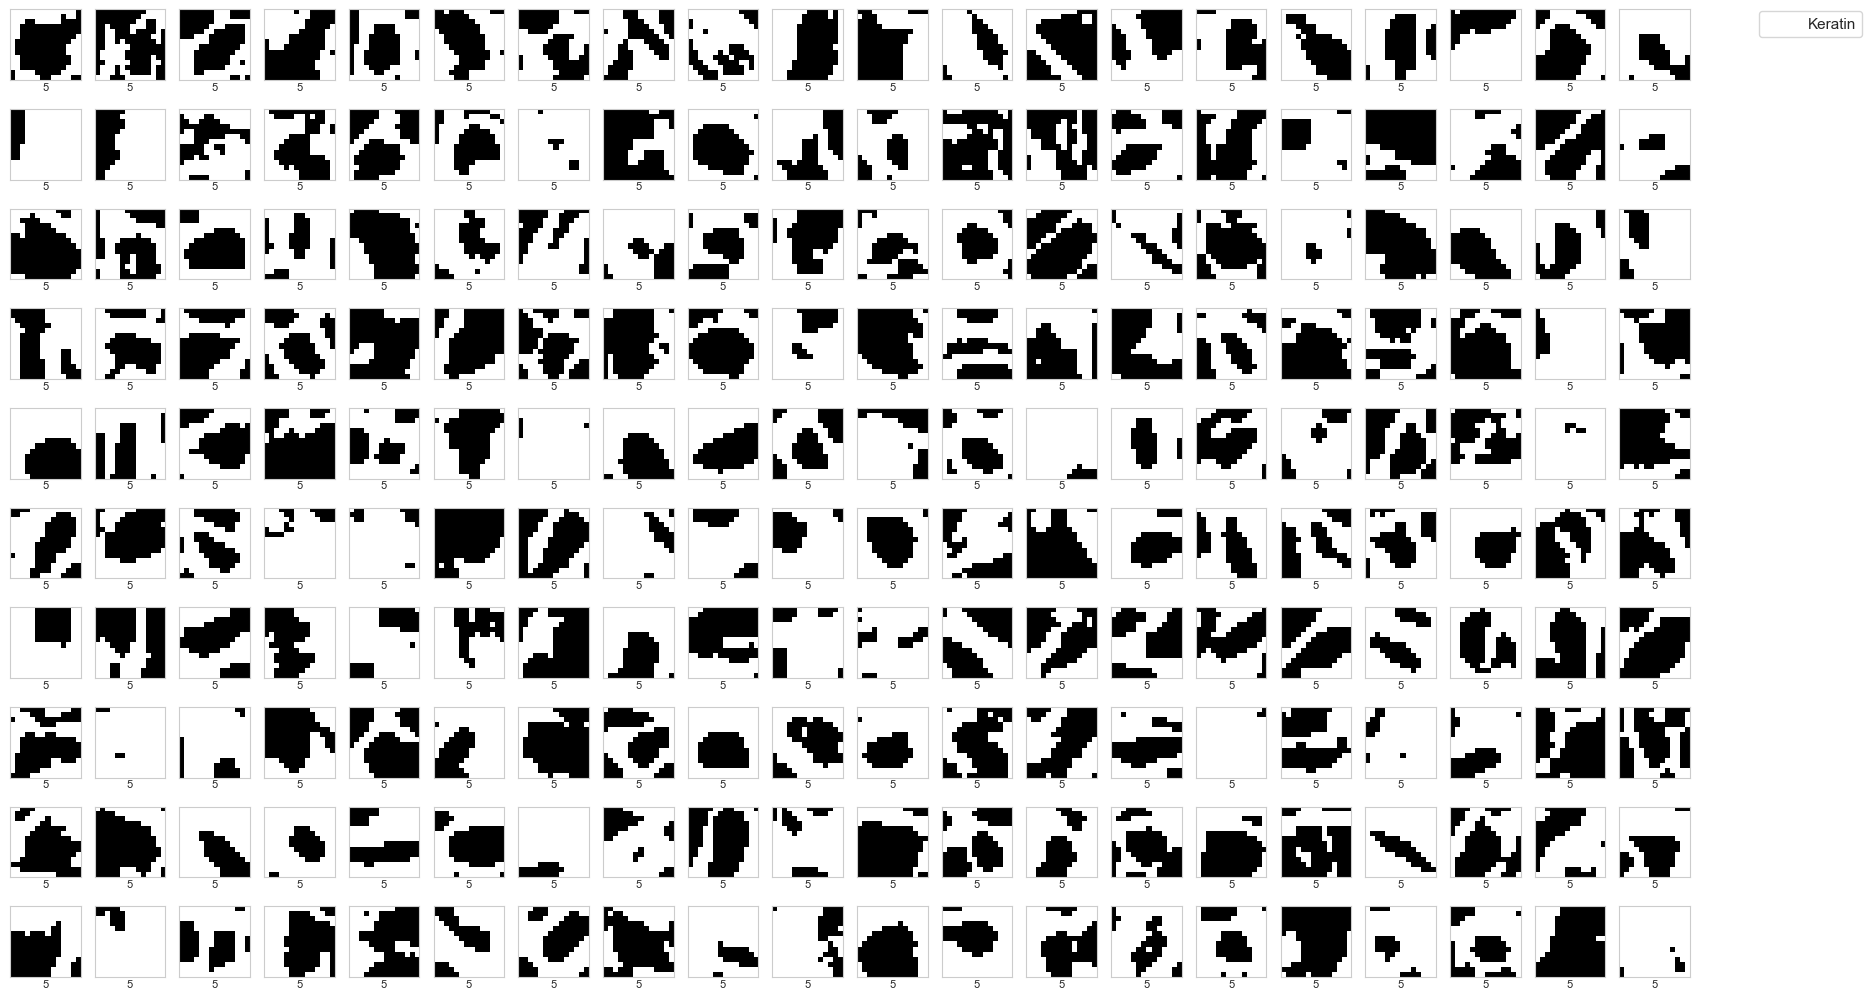

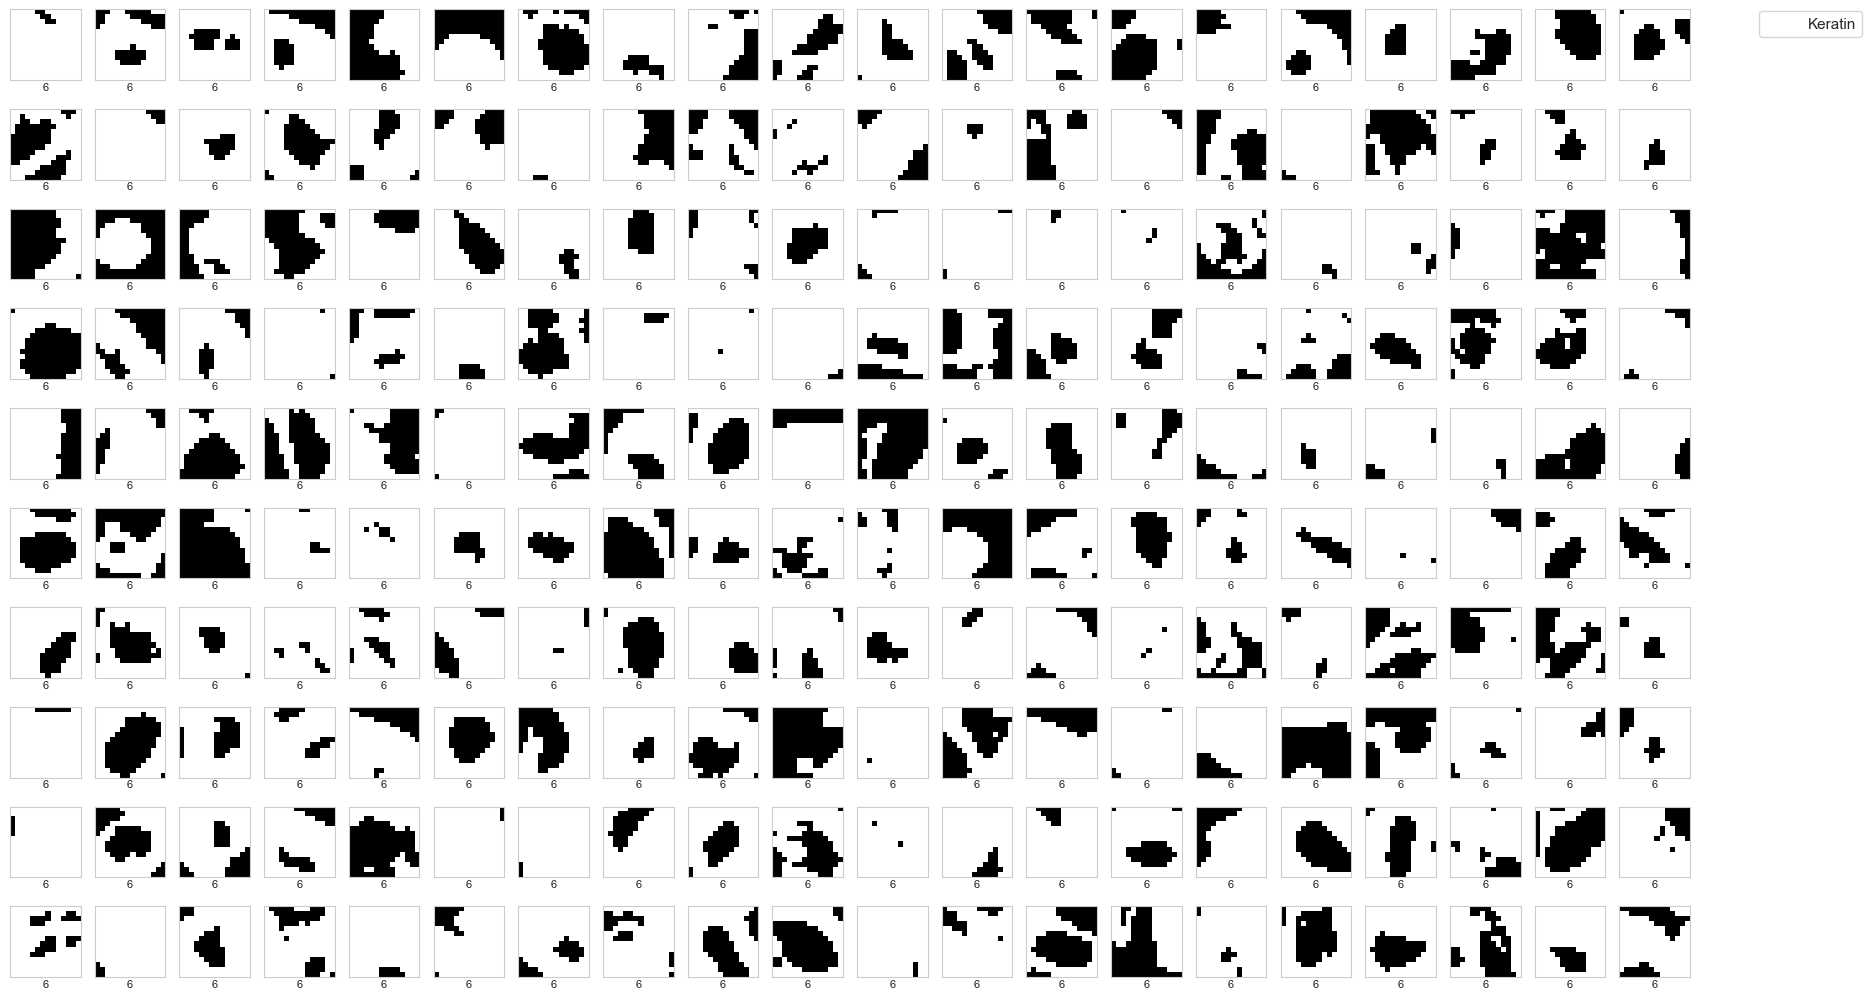

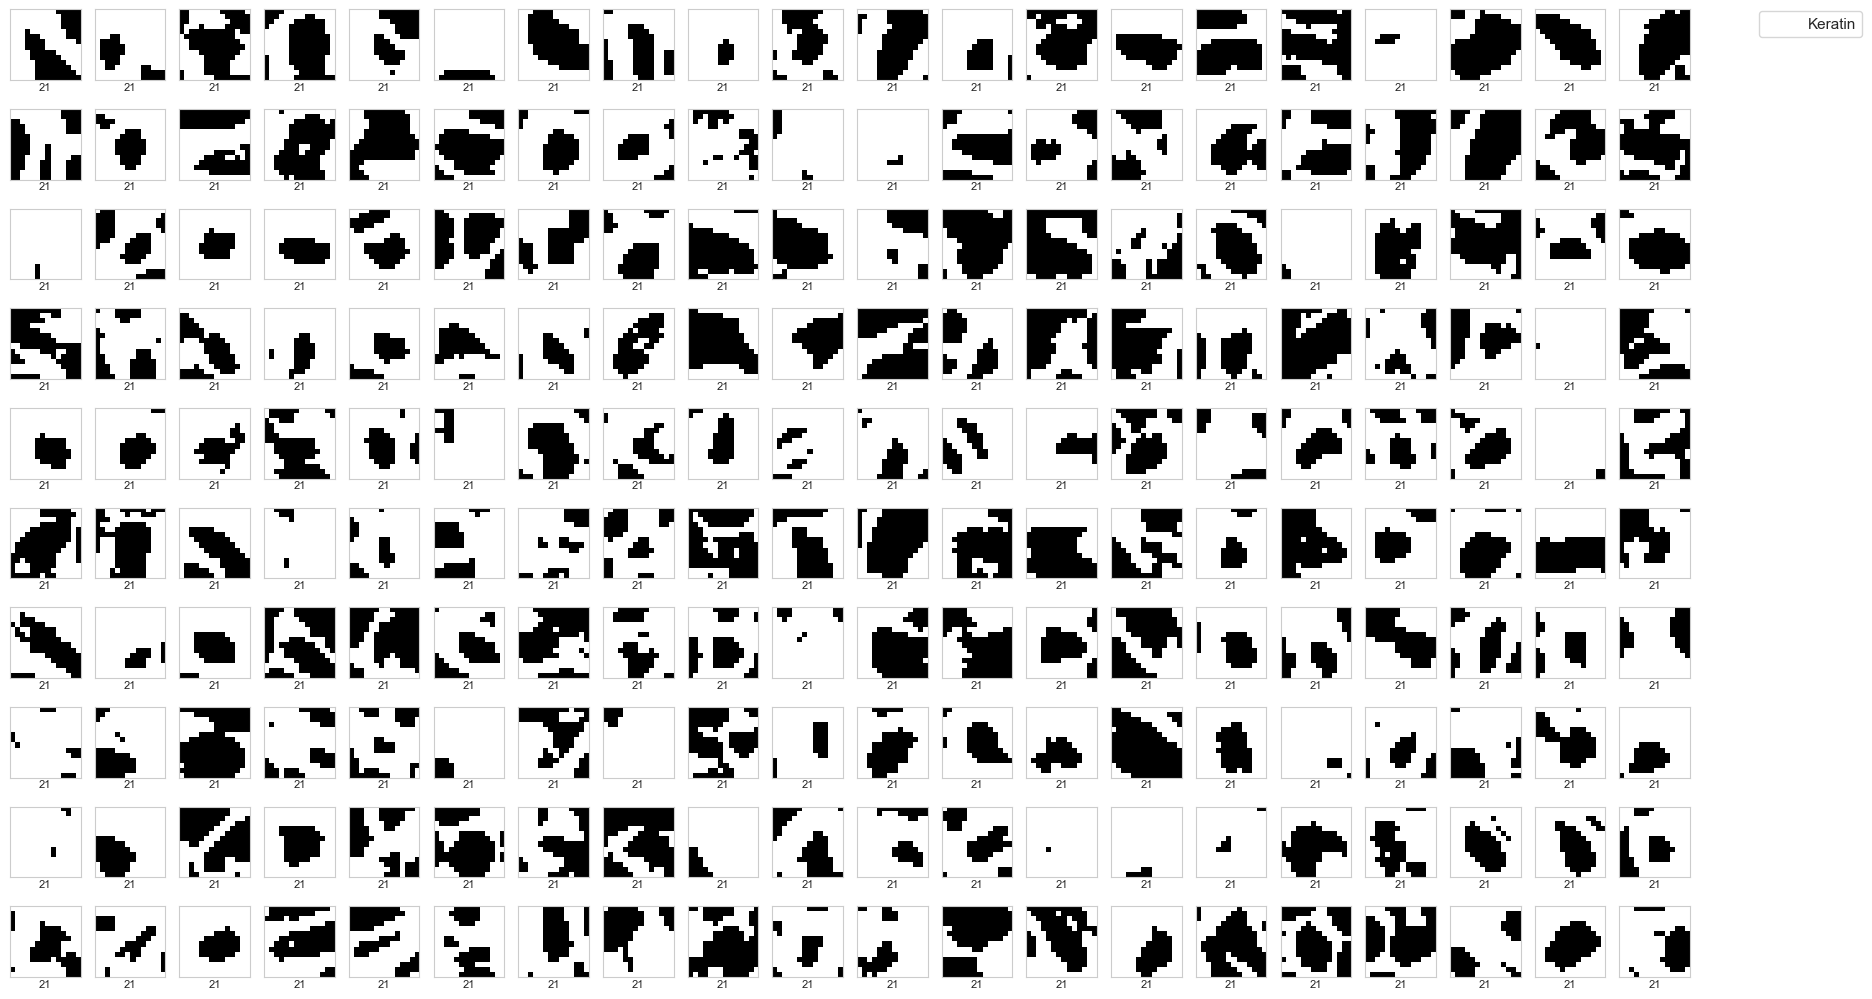

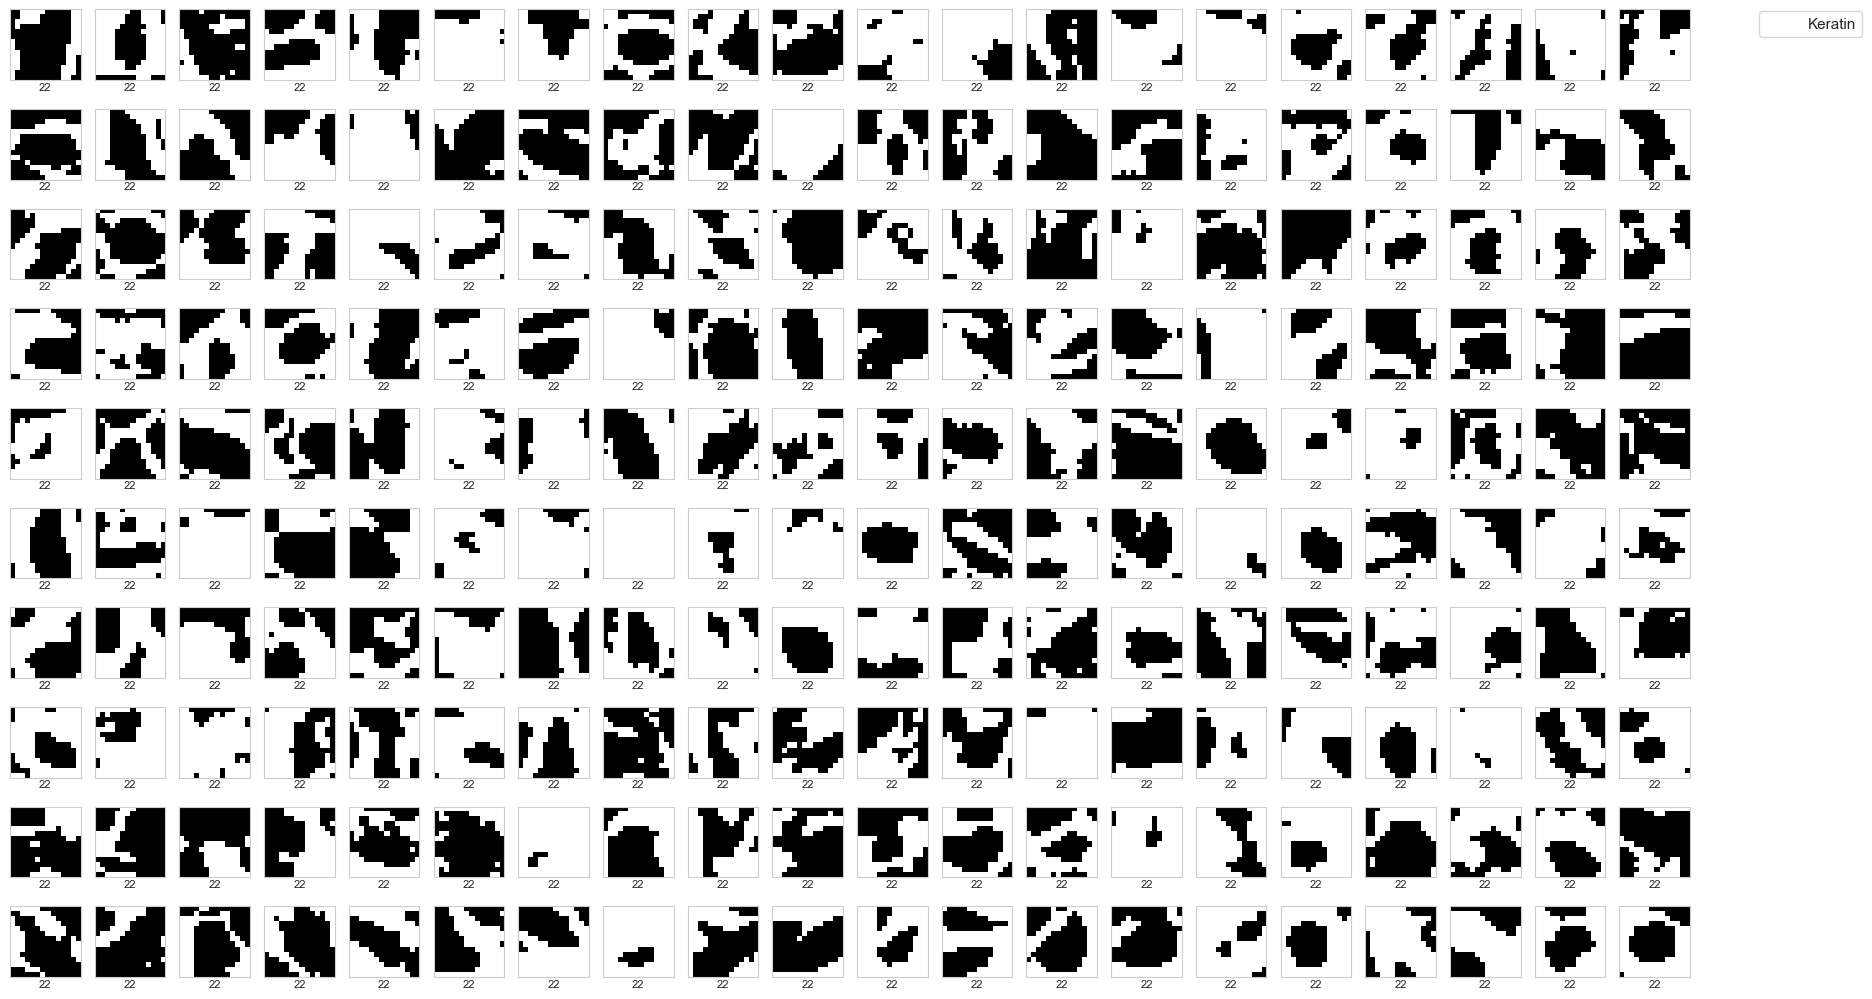

In [6]:
# number of patches per image gallery
gallery_size = 200

channel_color_dict = {
    'Keratin': (0, [1, 1, 1])
}

z_combo = os.path.join(
    parent_dir, 'input/binary_patches2/6_latent_space_LD412/combined_zarr'
)
z = zarr.open(z_combo)

for clus in natsorted(main['VAE9_VIG7'].unique()):
    
    data = main[main['VAE9_VIG7'] == clus].copy()
    imgs = z.get_orthogonal_selection((slice(None), data.index))
    data.reset_index(drop=True, inplace=True)
    
    thumb_ids = np.random.RandomState(1).choice(
        range(0, imgs.shape[1]), gallery_size, replace=False
    )
    imgs = imgs[:, thumb_ids, :, :]
    labels = data.iloc[thumb_ids].copy()
    labels.reset_index(drop=True, inplace=True)
    # labels.sort_values(by='VAE9_VIG7', inplace=True)
   
    PlotInputImgs(
        numExamples=gallery_size,
        numColumns=20,
        imgs=imgs,
        intensity_multiplier=1.1,
        labels=labels,
        fontSize=8,
        channel_color_dict=channel_color_dict,
        fileName=f'cluster_{clus}_patches',
        save_dir=out
    )
    print()